In [1]:
from fitparse import FitFile
def get_activity_type(filepath: str):
    fitfile = FitFile(filepath)

    # "sport" message usually holds activity type
    for msg in fitfile.get_messages("sport"):
        for field in msg:
            if field.name == "sport":
                return field.value

    # sometimes stored in "session" instead
    for msg in fitfile.get_messages("session"):
        for field in msg:
            if field.name == "sport":
                return field.value

    return None

In [2]:
from pathlib import Path

fit_folder = Path("./raw_fits")

cycling_fits = []
running_fits = []

for fit_file in fit_folder.glob("*.fit"):
    activity_type = get_activity_type(str(fit_file))
    if activity_type == "cycling":
        # add filename to cycling list
        cycling_fits.append(fit_file.name)
    elif activity_type == "running":
        # add file to running list
        running_fits.append(fit_file.name)
    else:
        continue


print(cycling_fits)
print(running_fits)


['2025-06-01-075603-ELEMNT_ROAM_C813-55-0.fit', '2025-01-14_08-47-56_1f79df94-ab1e-4265-9de1-ca3d0eebdfc7.fit', '2025-08-26-155643-ELEMNT_ROAM_C813-58-0.fit', '2025-01-14_17-58-54_a7c24092-949b-4321-811f-75bf32f10ffc.fit', '2025-04-09-170606-ELEMNT_ROAM_C813-46-0.fit', '2025-01-15_08-55-16_4b3ea2af-ea55-45e9-af13-5b372c608748.fit', '2025-08-20_19-22-11_e9e46bf0-d3ea-4e74-888f-18f02fa38925.fit', '2025-01-12_19-00-55_81fa44c1-982e-4c93-9df5-ebb57ab1ee06.fit', '2025-01-17_19-08-12_5faec8a9-fa49-4d63-9f83-44e7acffe59d.fit', '2025-04-19-121026-ELEMNT_ROAM_C813-47-0.fit', '2025-04-21-133443-ELEMNT_ROAM_C813-48-0.fit', '2025-08-29-175009-ELEMNT_ROAM_C813-59-0.fit', '2025-08-23-104719-ELEMNT_ROAM_C813-57-0.fit', '2025-08-22-174334-ELEMNT_ROAM_C813-56-0.fit', '2025-05-03-063747-ELEMNT_ROAM_C813-51-0.fit', '2025-01-14_21-14-01_4ef6e314-1ecd-42fd-821b-2bc4397ae3e5.fit', '2025-01-12_15-34-38_de33f3ab-6a56-4db9-bdec-28d2dd0f25bb.fit', '2025-05-18-100115-ELEMNT_ROAM_C813-53-0.fit', '2025-01-25-11053

Open all fit files in data folder

In [3]:
import pandas as pd

def fit_to_dataframe(filepath: str) -> pd.DataFrame:

    fitfile = FitFile(filepath)

    records = []
    for record in fitfile.get_messages("record"):
        data = {}
        for field in record:
            data[field.name] = field.value
        records.append(data)

    df = pd.DataFrame(records)

    if "timestamp" in df.columns:
        df["timestamp"] = pd.to_datetime(df["timestamp"])
        df = df.sort_values("timestamp").set_index("timestamp")

    return df

running_dfs = {}

for idx, fit in enumerate(running_fits):
    running_dfs[f"df{idx}"] = fit_to_dataframe(f"raw_fits/{fit}")

cycling_dfs = {}

for idx, fit in enumerate(cycling_fits):
    cycling_dfs[f"df{idx}"] = fit_to_dataframe(f"raw_fits/{fit}")


In [4]:
# remove known bad dataframes
del running_dfs['df74']
del running_dfs['df81']


for name, df in running_dfs.items():
    print(f"{name}: {df.shape}")



df0: (1815, 11)
df1: (2369, 11)
df2: (2702, 11)
df3: (3598, 11)
df4: (2999, 11)
df5: (3112, 11)
df6: (3792, 11)
df7: (1426, 11)
df8: (3017, 11)
df9: (3600, 11)
df10: (5722, 11)
df11: (3208, 11)
df12: (2464, 11)
df13: (2252, 11)
df14: (2047, 11)
df15: (2204, 11)
df16: (3202, 11)
df17: (2275, 11)
df18: (2177, 11)
df19: (3633, 11)
df20: (6134, 11)
df21: (1564, 11)
df22: (2104, 11)
df23: (2794, 11)
df24: (3628, 11)
df25: (2886, 11)
df26: (4686, 11)
df27: (4850, 11)
df28: (3630, 11)
df29: (2448, 11)
df30: (1765, 11)
df31: (2491, 11)
df32: (1799, 11)
df33: (3730, 11)
df34: (3299, 11)
df35: (3327, 11)
df36: (4470, 11)
df37: (3459, 11)
df38: (3601, 11)
df39: (2197, 11)
df40: (3381, 11)
df41: (1601, 10)
df42: (2492, 11)
df43: (3207, 11)
df44: (2529, 11)
df45: (1985, 11)
df46: (1861, 11)
df47: (2727, 11)
df48: (3737, 11)
df49: (3676, 11)
df50: (4769, 11)
df51: (1926, 11)
df52: (1771, 11)
df53: (2644, 11)
df54: (1812, 11)
df55: (5069, 11)
df56: (2130, 11)
df57: (5123, 11)
df58: (3398, 11)
df59: (

In [5]:

print(running_dfs['df51'])
# df to csv
#running_dfs['df51'].to_csv("running_df51.csv")


                     altitude  cadence  distance  enhanced_altitude  \
timestamp                                                             
2025-01-26 11:38:18       NaN        0       0.0                NaN   
2025-01-26 11:38:19       NaN        0       0.0                NaN   
2025-01-26 11:38:20       NaN        0       0.2                NaN   
2025-01-26 11:38:21       NaN        0       1.0                NaN   
2025-01-26 11:38:22       NaN        0       3.0                NaN   
...                       ...      ...       ...                ...   
2025-01-26 12:20:57      93.4       82    6313.7               93.4   
2025-01-26 12:20:58      93.6       82    6317.2               93.6   
2025-01-26 12:20:59      93.6       82    6319.9               93.6   
2025-01-26 12:21:00      93.8       80    6322.2               93.8   
2025-01-26 12:21:01      93.8       82    6324.1               93.8   

                     enhanced_speed  heart_rate left_right_balance  \
timest

In [6]:
import matplotlib.dates as mdates
def summarize_run(name, df, speed_threshold=0.75):
    """
    Summarize a run from a FIT DataFrame.
    Assumes:
      - df is indexed by timestamp
      - distance in meters
      - speed in m/s
    """
    df = df.copy()  # avoid side-effects

    start = df.index.min()
    end = df.index.max()
    elapsed_time = (end - start).total_seconds()

    # --- real_speed from deltas ---
    df["time_diff"] = df.index.to_series().diff().dt.total_seconds()
    if "distance" in df.columns:
        df["dist_diff"] = df["distance"].diff()
        df["real_speed"] = df["dist_diff"] / df["time_diff"]
    else:
        df["real_speed"] = None  # keeps column present

    # --- moving mask (reuse everywhere) ---
    moving_mask = df["real_speed"].gt(speed_threshold)  # handles NaNs gracefully

    # moving time (sum of time diffs when moving)
    moving_time = df.loc[moving_mask, "time_diff"].sum() if "time_diff" in df else None

    # distance
    total_distance = df["distance"].max() if "distance" in df.columns else None

    # average speeds (km/h)
    avg_speed_kmh = (total_distance / elapsed_time) * 3.6 if (total_distance and elapsed_time) else None
    avg_moving_speed_kmh = (total_distance / moving_time) * 3.6 if (total_distance and moving_time) else None

    # paces (min/km)
    avg_pace_min_per_km = (60 / avg_speed_kmh) if avg_speed_kmh else None
    avg_moving_pace_min_per_km = (60 / avg_moving_speed_kmh) if avg_moving_speed_kmh else None

    # --- Pa:HR (masked by movement in each half; still uses device 'speed' as requested) ---
    pa_hr = None
    if {"speed", "heart_rate"}.issubset(df.columns):
        n = len(df)
        first_half = df.iloc[: n // 2]
        second_half = df.iloc[n // 2 :]

        fh = first_half[first_half["real_speed"].gt(speed_threshold)]
        sh = second_half[second_half["real_speed"].gt(speed_threshold)]

        if not fh.empty and not sh.empty:
            pa1 = fh["speed"].mean()
            hr1 = fh["heart_rate"].mean()
            pa2 = sh["speed"].mean()
            hr2 = sh["heart_rate"].mean()
            if hr1 and hr2:  # avoid div by zero / None
                ratio1 = pa1 / hr1
                ratio2 = pa2 / hr2
                pa_hr = ((ratio2 / ratio1) - 1) * -100  # keep your sign convention

    # --- Cadence & HR (apply the SAME moving mask) ---
    if moving_mask.any():
        avg_cadence = (df.loc[moving_mask, "cadence"].mean() * 2.0) if "cadence" in df.columns else None
        max_heart_rate = df.loc[moving_mask, "heart_rate"].max() if "heart_rate" in df.columns else None
        avg_heart_rate = df.loc[moving_mask, "heart_rate"].mean() if "heart_rate" in df.columns else None
    else:
        avg_cadence = None
        max_heart_rate = None
        avg_heart_rate = None

    return {
        "name": name,
        "start_time": start,
        "end_time": end,
        "start_date": pd.to_datetime(start.date()),
        "start_time_of_day": start.time(),
        "day_of_week": start.day_name(),
        "elapsed_time_min": elapsed_time / 60 if elapsed_time else None,
        "moving_time_min": (moving_time / 60) if moving_time else None,
        "total_distance_km": (total_distance / 1000) if total_distance else None,
        "elevation_gain_m": (df["altitude"].max() - df["altitude"].min()) if "altitude" in df.columns else None,
        "avg_speed_kmh": avg_speed_kmh,
        "avg_pace_min_per_km": avg_pace_min_per_km,
        "avg_moving_speed_kmh": avg_moving_speed_kmh,
        "avg_moving_pace_min_per_km": avg_moving_pace_min_per_km,
        "avg_cadence": avg_cadence,               # masked
        "max_heart_rate": max_heart_rate,         # masked
        "avg_heart_rate": avg_heart_rate,         # masked
        "pa_hr_percent": pa_hr,
    }


running_summary_df = (
    pd.DataFrame(
        [summarize_run(name, df) for name, df in running_dfs.items()]
    )
    .set_index("name")
    .sort_values("start_time")
)

running_summary_df["start_mins_since_midnight"] = (
    running_summary_df["start_time_of_day"].apply(lambda t: t.hour * 60 + t.minute)
)
running_summary_df["efficiency_ratio"] = running_summary_df["avg_moving_speed_kmh"] / running_summary_df["avg_heart_rate"]
running_summary_df["start_date"] = pd.to_datetime(running_summary_df["start_date"])
running_summary_df["start_date_num"] = mdates.date2num(running_summary_df["start_date"])



display(running_summary_df)



,start_time,end_time,start_date,start_time_of_day,day_of_week,elapsed_time_min,moving_time_min,total_distance_km,elevation_gain_m,avg_speed_kmh,avg_pace_min_per_km,avg_moving_speed_kmh,avg_moving_pace_min_per_km,avg_cadence,max_heart_rate,avg_heart_rate,pa_hr_percent,start_mins_since_midnight,efficiency_ratio,start_date_num
name,,,,,,,,,,,,,,,,,,,,
df87,2025-01-08 07:42:31,2025-01-08 08:08:41,2025-01-08,07:42:31,Wednesday,26.166667,24.650000,5.0222,39.4,11.515873,5.210200,12.224422,4.908208,165.933739,183.0,168.647059,18.138897,462,0.072485,20096.0
df31,2025-01-21 07:41:31,2025-01-21 08:23:09,2025-01-21,07:41:31,Tuesday,41.633333,38.866667,7.1485,73.2,10.302082,5.824066,11.035420,5.437038,162.353345,159.0,143.280875,-19.988739,461,0.077019,20109.0
df77,2025-01-24 07:18:54,2025-01-24 08:10:56,2025-01-24,07:18:54,Friday,52.033333,45.950000,9.0541,73.4,10.440346,5.746936,11.822546,5.075049,163.553863,168.0,152.642002,-2.836142,438,0.077453,20112.0
df51,2025-01-26 11:38:18,2025-01-26 12:21:01,2025-01-26,11:38:18,Sunday,42.716667,31.933333,6.3241,42.8,8.882856,6.754584,11.882443,5.049467,165.416493,175.0,155.250522,-2.791565,698,0.076537,20114.0
df88,2025-01-27 19:34:35,2025-01-27 20:26:41,2025-01-27,19:34:35,Monday,52.100000,44.716667,9.3441,121.2,10.760960,5.575711,12.537741,4.785551,163.631755,173.0,150.482296,1.006850,1174,0.083317,20115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
df19,2025-08-12 19:00:07,2025-08-12 20:09:13,2025-08-12,19:00:07,Tuesday,69.100000,57.250000,11.1318,68.2,9.665818,6.207442,11.666515,5.142924,161.774672,174.0,156.927802,7.820524,1140,0.074343,20312.0
df33,2025-08-13 18:06:29,2025-08-13 19:14:03,2025-08-13,18:06:29,Wednesday,67.566667,53.300000,10.7519,50.8,9.547815,6.284161,12.103452,4.957263,160.987492,183.0,162.165416,5.974759,1086,0.074636,20313.0
df29,2025-08-15 19:35:23,2025-08-15 20:16:24,2025-08-15,19:35:23,Friday,41.016667,39.866667,8.2424,77.2,12.057148,4.976301,12.404950,4.836779,166.206522,178.0,164.654264,8.730292,1175,0.075339,20315.0


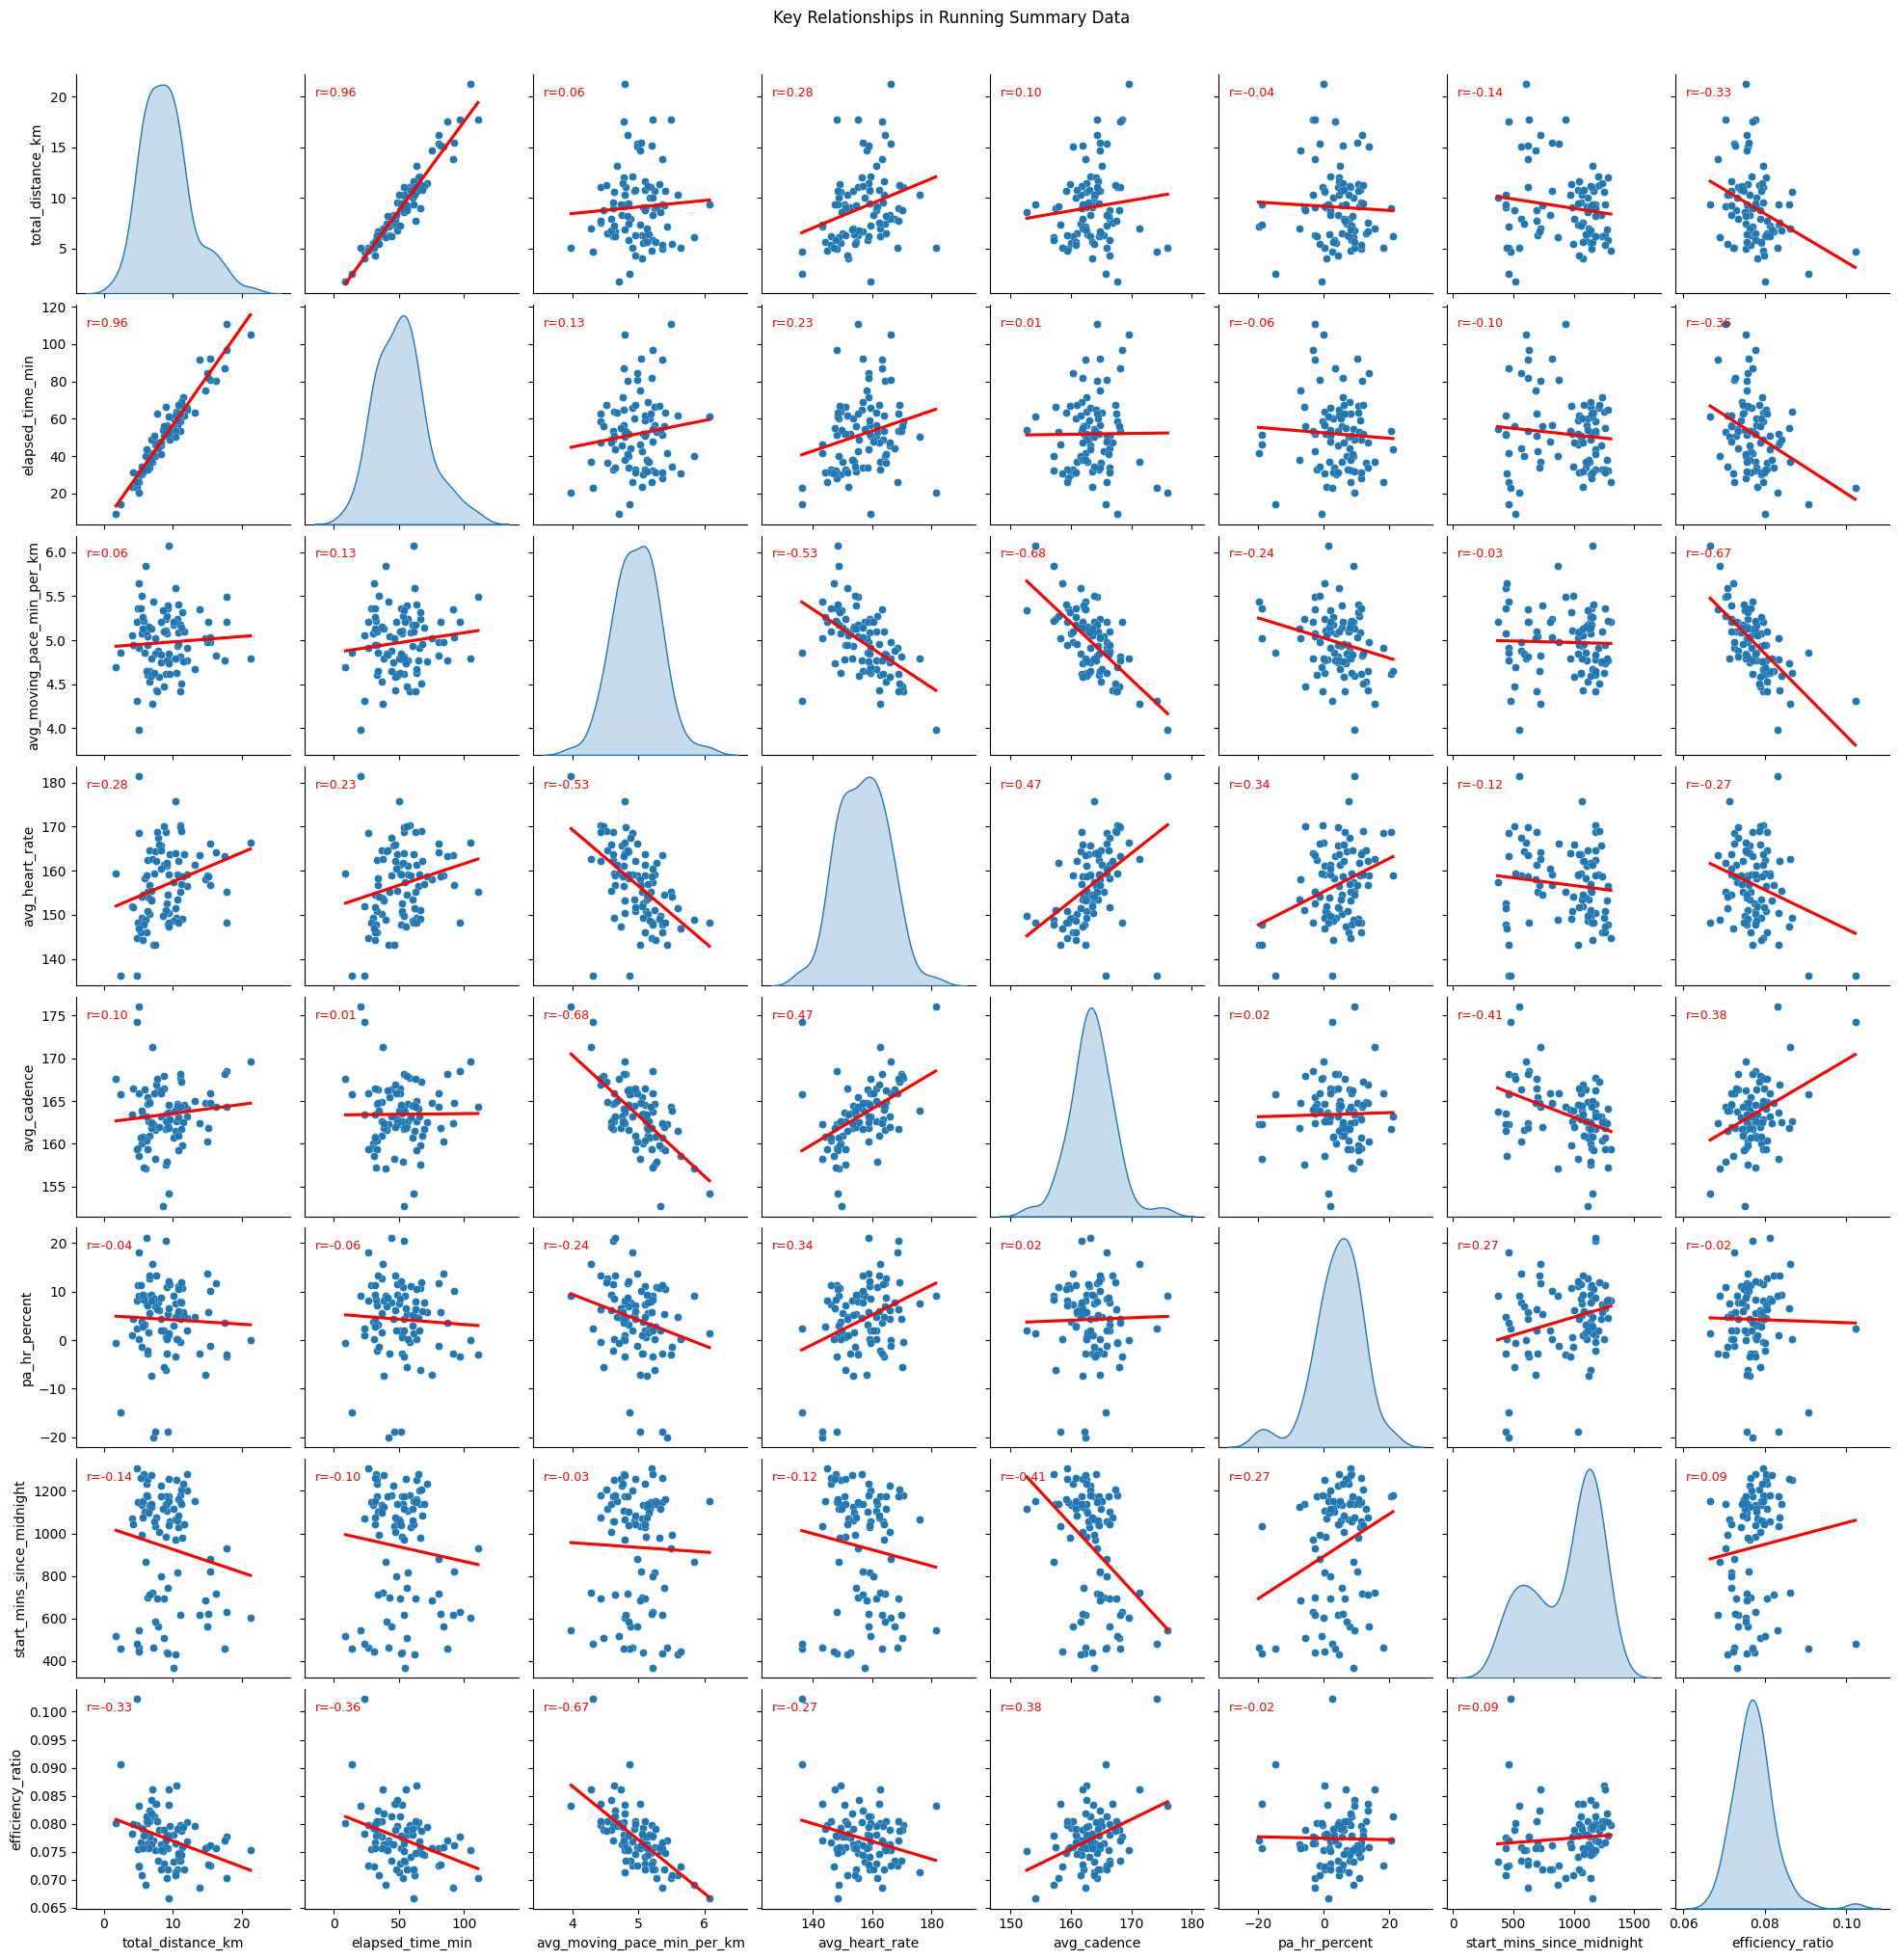

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# curated set of interesting metrics
cols = [
    "total_distance_km",
    "elapsed_time_min",
    "avg_moving_pace_min_per_km",
    "avg_heart_rate",
    "start_time_of_day",
    "avg_cadence",
    "pa_hr_percent",
    "start_mins_since_midnight",
    "efficiency_ratio",
]
df_clean = running_summary_df[cols].dropna()


def scatter_with_corr(x, y, **kwargs):
    ax = plt.gca()
    # plot regression line + scatter
    sns.regplot(x=x, y=y, scatter_kws={"alpha":0.5, "s":20}, line_kws={"color":"red"}, ci=None, ax=ax)
    # compute Pearson r
    if len(x) > 1 and len(y) > 1:
        r, p = pearsonr(x, y)
        ax.annotate(f"r={r:.2f}", xy=(0.05, 0.9), xycoords="axes fraction", fontsize=9, color="red")

# build pairplot with custom off-diagonal
g = sns.pairplot(df_clean[cols], diag_kind="kde")
g.map_offdiag(scatter_with_corr)

plt.suptitle("Key Relationships in Running Summary Data", y=1.02)
plt.show()


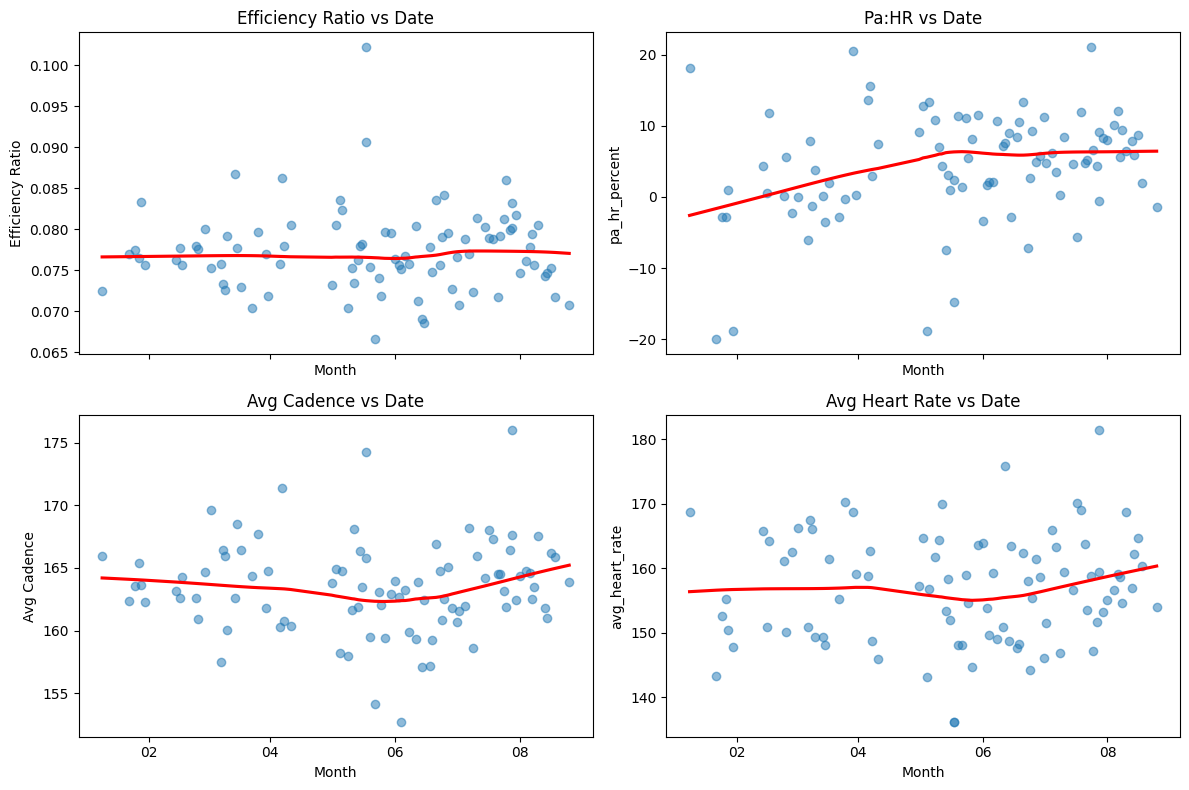

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


# Ensure start_date is datetime
running_summary_df["start_date"] = pd.to_datetime(running_summary_df["start_date"])

# Convert dates → numeric ordinals
running_summary_df["start_date_num"] = running_summary_df["start_date"].map(pd.Timestamp.toordinal)

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

# 1. Efficiency Ratio
sns.regplot(
    data=running_summary_df,
    x="start_date_num", y="efficiency_ratio",
    lowess=True, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"},
    ax=axes[0,0]
)
axes[0,0].set_title("Efficiency Ratio vs Date")
axes[0,0].set_ylabel("Efficiency Ratio")

# 2. Pa:HR
sns.regplot(
    data=running_summary_df,
    x="start_date_num", y="pa_hr_percent",
    lowess=True, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"},
    ax=axes[0,1]
)
axes[0,1].set_title("Pa:HR vs Date")

# 3. Avg Cadence
sns.regplot(
    data=running_summary_df,
    x="start_date_num", y="avg_cadence",
    lowess=True, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"},
    ax=axes[1,0]
)
axes[1,0].set_title("Avg Cadence vs Date")
axes[1,0].set_ylabel("Avg Cadence")

# 4. Avg HR
sns.regplot(
    data=running_summary_df,
    x="start_date_num", y="avg_heart_rate",
    lowess=True, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"},
    ax=axes[1,1]
)
axes[1,1].set_title("Avg Heart Rate vs Date")

# --- Shared date formatting for all x-axes ---
date_min = running_summary_df["start_date"].min()
date_max = running_summary_df["start_date"].max()
ticks = pd.date_range(date_min, date_max, freq="2ME")

for ax in axes.flat:
    ax.set_xlabel("Month")
    ax.set_xticks([d.toordinal() for d in ticks])
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m"))

plt.tight_layout()
plt.show()


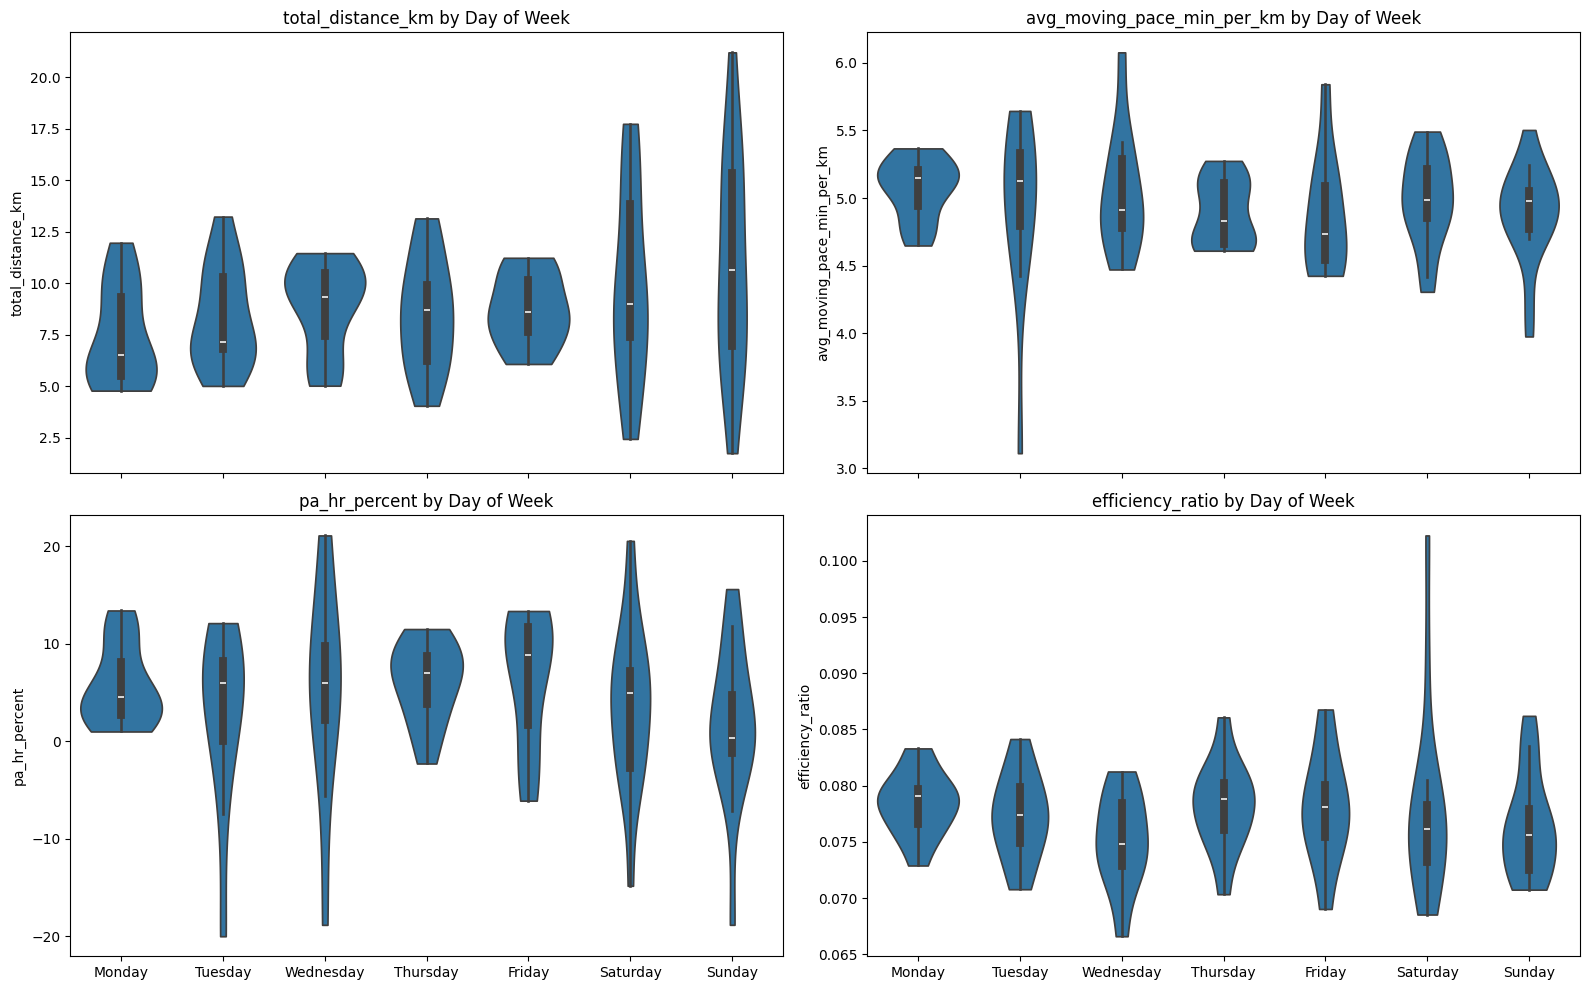

In [9]:
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
cols = [
    "total_distance_km",
    "avg_moving_pace_min_per_km",
    "pa_hr_percent",
    "efficiency_ratio",
]

df_plot = running_summary_df.copy()
for c in cols:
    df_plot[c] = pd.to_numeric(df_plot[c], errors="coerce")

# make grid
ncols = 2
nrows = int(np.ceil(len(cols) / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10), sharex=True)

for ax, metric in zip(axes.flat, cols):
    sns.violinplot(
        data=df_plot,
        x="day_of_week", y=metric,
        order=order,
        ax=ax,
        inner="box",   # adds mini boxplot inside
        cut=0
    )
    ax.set_title(f"{metric} by Day of Week")
    ax.set_xlabel("")
    ax.set_ylabel(metric)

# remove unused axes if cols < nrows*ncols
for ax in axes.flat[len(cols):]:
    ax.remove()

plt.tight_layout()
plt.show()
